<a href="https://colab.research.google.com/github/luisdiaz1997/DataScienceCourse/blob/master/Week_12_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train[:, :,:, None] /255
x_test = x_test[:, :, :, None] /255



In [0]:
x_train_flat = x_train.reshape(-1, 28*28)

#PCA (Principal Component Analysis) Review

In [0]:
from sklearn import decomposition

pca_model = decomposition.PCA(n_components= 2)

pca_data = pca_model.fit_transform(x_train_flat)


In [5]:
pca_data.shape

(60000, 2)

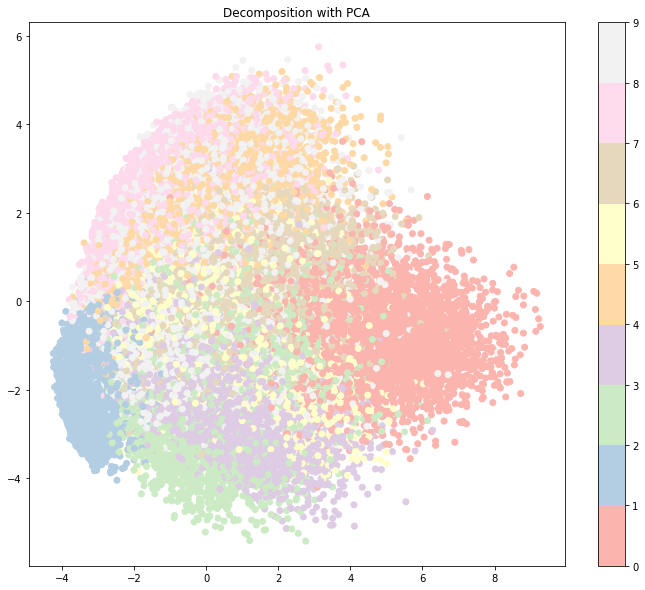

In [6]:
plt.figure(1, figsize= (12, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c = y_train, cmap = 'Pastel1')
plt.colorbar()
plt.title('Decomposition with PCA');

#MDS (Multidimesional Scaling)

In [0]:
from sklearn import manifold

MDS_model = manifold.MDS(n_components= 2)

MDS_data = MDS_model.fit_transform(x_train_flat[::50])

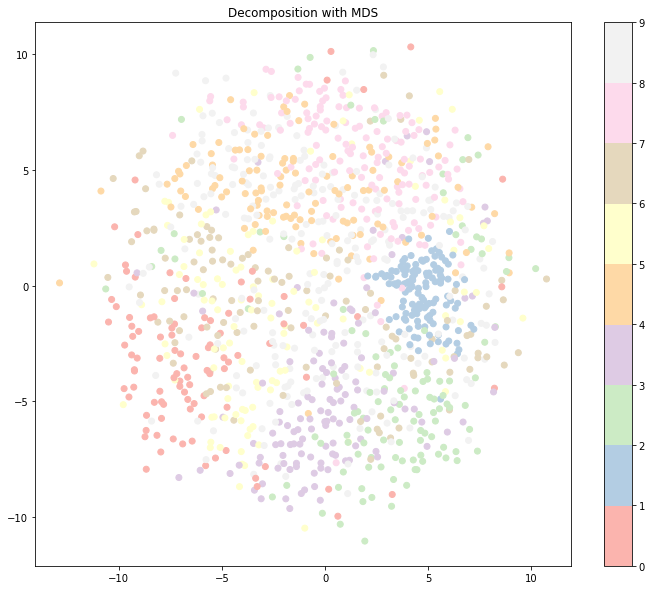

In [15]:
plt.figure(2, figsize= (12, 10))
plt.scatter(MDS_data[:, 0], MDS_data[:, 1], c = y_train[::50], cmap = 'Pastel1')
plt.colorbar()
plt.title('Decomposition with MDS');

#TSNE

In [0]:
from sklearn import manifold

TSNE_model = manifold.TSNE(n_components= 2)

TSNE_data = TSNE_model.fit_transform(x_train_flat[::50])

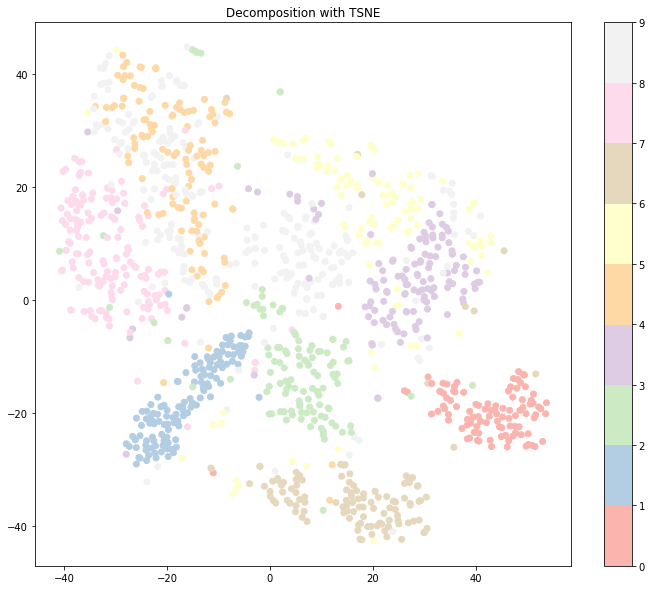

In [23]:
plt.figure(3, figsize= (12, 10))
plt.scatter(TSNE_data[:, 0], TSNE_data[:, 1], c = y_train[::50], cmap = 'Pastel1')
plt.colorbar()
plt.title('Decomposition with TSNE');

# Autoencoders

In [0]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Conv2D, MaxPooling2D, Flatten, Reshape, Input

In [0]:
encoder = Sequential([
                      Flatten(input_shape = (28, 28, 1)),
                      Dense(128),
                      Activation('relu'),
                      Dense(64),
                      Activation('relu'),
                      Dense(16),
                      Activation('tanh')
])

In [91]:
encoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_28 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_29 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)                1040      
_________________________________________________________________
activation_30 (Activation)   (None, 16)              

In [0]:
decoder =  Sequential([
                      Dense(64, input_shape = (16,)),
                      Activation('relu'),
                      Dense(128),
                      Activation('relu'),
                      Dense(28*28),
                      Activation('relu'),
                      Reshape((28, 28, 1))
])

In [93]:
decoder.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                1088      
_________________________________________________________________
activation_31 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
activation_32 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 784)               101136    
_________________________________________________________________
activation_33 (Activation)   (None, 784)               0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28, 1)       

In [0]:
autoencoder = Sequential([encoder, decoder])

In [95]:
autoencoder.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 16)                109776    
_________________________________________________________________
sequential_13 (Sequential)   (None, 28, 28, 1)         110544    
Total params: 220,320
Trainable params: 220,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer = 'adam', loss= 'MSE', metrics= ['accuracy'])

In [97]:
autoencoder.fit(x_train, x_train, batch_size= 32, epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0304 - accuracy: 0.8086
Epoch 2/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0209 - accuracy: 0.8117
Epoch 3/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0192 - accuracy: 0.8123
Epoch 4/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0180 - accuracy: 0.8125
Epoch 5/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0170 - accuracy: 0.8127
Epoch 6/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0165 - accuracy: 0.8128
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0162 - accuracy: 0.8129
Epoch 8/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0159 - accuracy: 0.8130
Epoch 9/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0157 - accuracy: 0.8130
Epoch 10/10
60000/60000 [============

In [0]:
x_test_predict = autoencoder.predict(x_test)

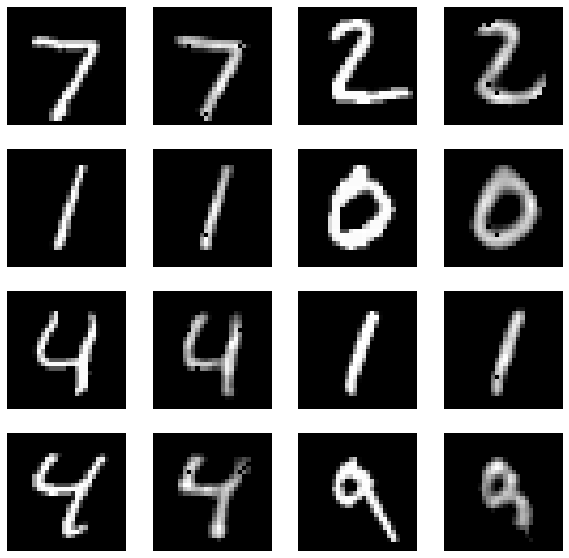

In [99]:
plt.figure(4, figsize = (10, 10))
for i in range(8):
  plt.subplot(4, 4,(2*i) +1)
  plt.imshow(x_test[i,:, :, 0], cmap = 'gray')
  plt.axis('off')
  plt.subplot(4,4, (2*i) +2)
  plt.imshow(x_test_predict[i, :, :, 0], cmap = 'gray')
  plt.axis('off')

In [0]:
encoded = encoder.predict(x_test)

In [0]:
from sklearn import manifold

MDS_model = manifold.MDS(n_components= 2)

MDS_data = MDS_model.fit_transform(encoded[::10])

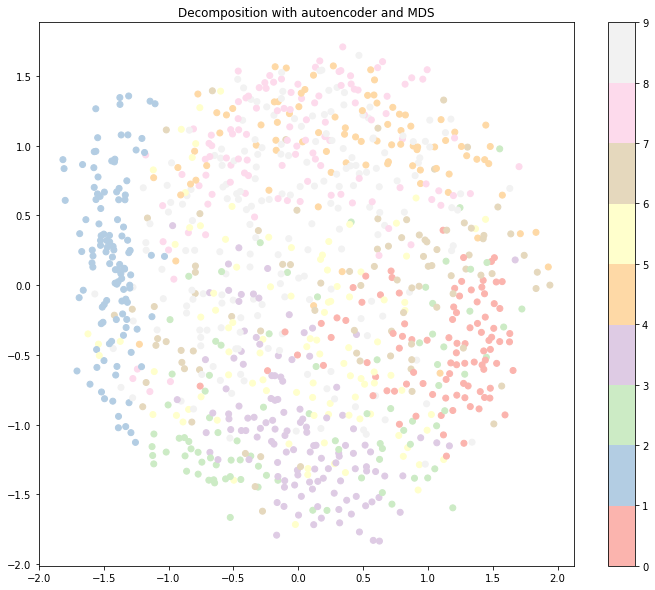

In [106]:
plt.figure(3, figsize= (12, 10))
plt.scatter(MDS_data[:, 0], MDS_data[:, 1], c = y_test[::10], cmap = 'Pastel1')
plt.colorbar()
plt.title('Decomposition with autoencoder and MDS');